## Lesson 2: Data Sampling: Mathematics and Guiding Principles

Author: [Christopher Monterola](https://www.chrismonterola.net)

Copyright © 2018, 2019 Christopher Monterola. All rights reserved.

This notebook was written, conceptualized, and prepared for the Mathematics for Data Science course under AIM's MS in Data Science program. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

The author would like to acknowledge the AIM MSDS program team members for their help and support in building the notebooks. 


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

---

### Executive Summary
Based on the practices of survey firms (e.g. Social Weather Station or Pulse Asia in the Philippines) randomly choosing 1,200 samples from a given population is enough to determine the socio-demographic profile of an entire population. How accurate is this claim? 

The population need not be small; as long as the sample is taken randomly, it should be acceptable. Survey organizations typically use the term **confidence interval** and **margin of error** supplementary to survey results. What do these mean and what do they actually represent? 

The perspective derivable in this lesson will provide a fundamental guide on how to assess the level of data granularity needed to come up with a sensible model. In particular, one will understand why only 1,200 of 50 million voters are needed to forecast election results, but almost all million transactions are needed to detect fraud.


Lessons that can be learned in this notebook:

1. General probability concept
2. Meaning of confidence interval and margin of error
3. Basic simulation of results with actual population using Monte Carlo method



### 1. Binomial Distribution

A binomial distribution results from experiments with two possible outcomes. An example of a binomial experiment is tossing a coin (heads or tails). 

The probability that a random variable $X$ has $k$ (where $k = 1, 2, \ldots, n$) successes from $n$ observations is

\begin{equation}
P (X = k) = \binom{n}{k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
\end{equation}

The following conditions must apply when using a binomial distribution in describing the behavior of $X$:

1. The number of observations $n$ is fixed.
2. The observations must be independent of each other.
3. Each observation must have **two outcomes** (success with probability $p$ or failure with probability $q = 1 - p$).
4. The probability of success must be the same for all observations.

In the case of a coin toss, $p$ is the probability of getting heads and $q = 1-p$ is the probability of getting tails; an unbiased/fair coin has the value $p = q = 0.5$.  The mean $\mu$, variance $\sigma^2$ of this distribution is given by:

\begin{equation}
\mu_X =np  
\end{equation}

\begin{equation}
\sigma^2_X = np(1-p)
\end{equation}

**Example 1.**
What is the probability $P$ that we will get tails if we flipped a coin? Where: $p=0.5,\,n=1,\,k=1$

**Example 2.**
What is the probability $P$ that we will get tails if we flip Scarface's coin (with both heads)? Where: $p=0,\,n=1,\,k=1$


**Example 3.** 
What is the probability $P$ that we will get 40 tails with 100 coin tosses? Where: $p=0.5,\,n=100,\,k=40$


In [1]:
#ex1
from math import factorial

n = 1 #num of tosses
p = 0.5
k = 1 #number of tails

p_of_1 = (factorial(n) / (factorial(k)*factorial(n-k))) * p**k * (1-p)**(n-k)
p_of_1

0.5

In [31]:
#ex2 using comb
from scipy.special import comb

n = 1 #num of tosses
p = 0 #prob of getting tails
k = 1 #number of tails
p_of_1 = comb(n,k) * p**k * (1-p)**(n-k)
p_of_1

0.0

In [20]:
from math import factorial

n = 100
p = 0.5
k = 40

P_of_40 = (factorial(n) / (factorial(k) * factorial(n - k))) * (p**k) * ((1 - p)**(n - k))

print(P_of_40) #1% of getting 40 tails in 100 tosses

0.010843866711637987


#### Example 4a. Analytical Calculation
Suppose you flip a fair coin 100 times. Let $X \sim \text{Binomial}(p = 0.5, n = 100)$, i.e. the number of heads in 100 flips.

a) Calculate the probabilities $f(X = k)$ analytically (i.e. using the formula) and store the values in an array.

b) Check that the sum of the probabilities equals 1.

c) Plot the probability mass function. What does it look like?

Note: Analytically, we know that $X$ has mean $np = 100(0.5) = 50$ and variance $np(1-p) = 100(0.5)(0.5) = 25$. 

Sum of Probabilities = 1.0


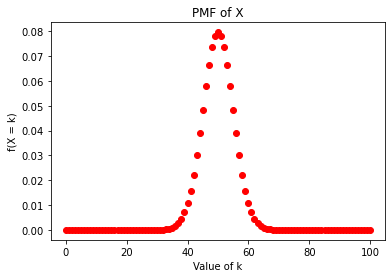

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import binom #same as math comb

n = 100
p = 0.5

k_values = np.arange(0, n + 1) #possible tail outcomes in the 100 tosses you made; k = 0 means 0 tails out of 100 tosses

p_of_k = np.array([binom(n, k) * (p**k) * ((1 - p)**(n - k)) for k in k_values]) # Analytic solution

print('Sum of Probabilities =', sum(p_of_k))

plt.plot(k_values, p_of_k, 'ro') #use dots so to remind you that this is a discrete problem
plt.title("PMF of X")
plt.xlabel('Value of k')
plt.ylabel('f(X = k)')
plt.show()

#### Example 4b. Numerical Solution (Simulating Bernoulli r.v.s)
Suppose we didn't know the formula of a Binomial distribution. Let's instead estimate $X$'s pmf by simulating Bernoulli random variables (i.e. flipping coins).

a) Sample a <b><u>single</b></u> $X$ by simulating 100 coin flips and counting the number of heads.

b) Sample $X$ 1000 times and plot the histogram against the pmf we calculated above.

c) Sample $X$ 10000 times and plot the histogram against the pmf we calculated above. What happens?

In [3]:
#4b a.

n = 100
possible_X = [0, 1]
p = [0.5, 0.5]

coin_flips = np.random.choice(possible_X, size = n, replace = True, p = p)
X = sum(coin_flips)

print(coin_flips)
print(X)

[1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0]
43


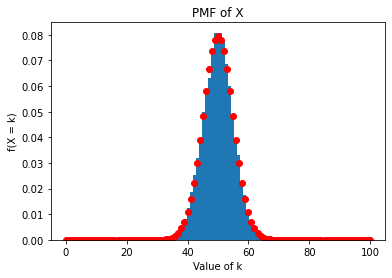

In [13]:
#4b b.
sample_size = 10000
n = 100
possible_X = [0, 1]
p = [0.5, 0.5]

X = []
for i in range(0, sample_size):
    coin_flips = np.random.choice(possible_X, size = n, replace = True, p = p)
    X.append(sum(coin_flips))

# X = np.random.binomial(n = 100, p = 0.5, size = sample_size) ## Short cut! Also a lot more efficient.
#print(X)
    
plt.plot(k_values, p_of_k, 'ro')
plt.hist(X, bins = 40, density = True)
plt.title("PMF of X")
plt.xlabel('Value of k')
plt.ylabel('f(X = k)')
plt.show()

#### Interactive Widget

Total probability = 0.999


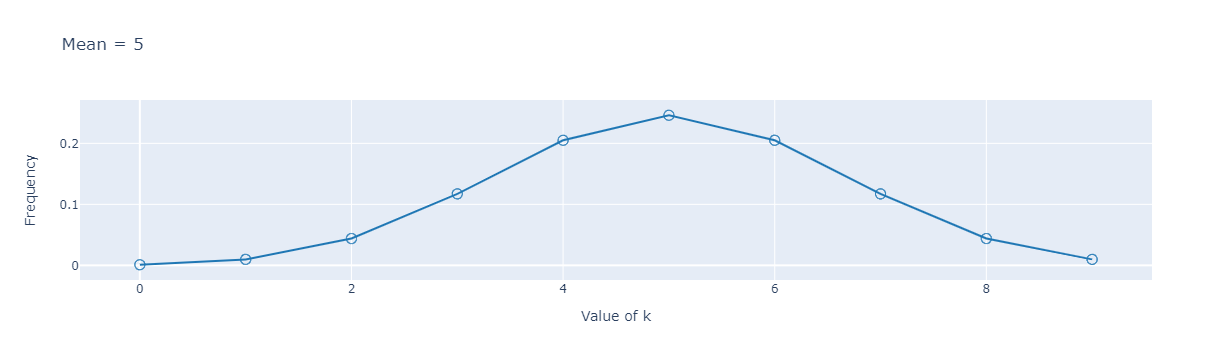

In [14]:
import ipywidgets as widgets
from IPython.display import display
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.tools as tools
pyoff.init_notebook_mode(connected=True)

def totProbView(n, p, q):
    pList = [binom(n,k)*(p**k)*(q**(n-k)) for k in range(n)]
    kList = [k for k in range(n)]
    print("Total probability = {0:.3f}".format(sum(pList)))
    pyoff.iplot({'data': [{"x": kList, "y": pList,
                 'marker': {'color': '#1F77B4', 'size': 10, 'symbol': 'circle-open'},
                 'mode': 'markers + lines',
                 'type': 'scatter'}],
                 'layout': {'title': "Mean = {}".format(int(n*p)),
                  'xaxis': {'title': "Value of k"},
                  'yaxis': {'title': "Frequency"}}})

#Setup Slider and Bind Dependent Arguments
pWidget = widgets.FloatSlider(min=0.0, max=0.99, step=0.01, value=0.5, continuous_update=False)
qWidget = widgets.FloatSlider(min=0.0, max=0.99, step=0.01, value=0.5, continuous_update=False)
nWidget = widgets.IntSlider(min=1, max=1000, step=1, value=10, continuous_update=False)

def pUpdate(*args):
    qWidget.value = 1.0 - pWidget.value
    
def qUpdate(*args):
    pWidget.value = 1.0 - qWidget.value
    
pWidget.observe(pUpdate, 'value')
qWidget.observe(qUpdate, 'value')

widgets.interact(totProbView, p=pWidget, q=qWidget, n=nWidget);

#### Example 5.  From Binomial to Gaussian distribution

Note that as we increase $n$, our binomial distribution appears to become more "gaussian" like. In fact, we can show that, given $X$ is a binomial r.v., when $n \rightarrow \infty$ while $p$ remains fixed, the distribution of:

\begin{equation}
\frac{X - \mu}{\sigma} = \frac{X - np}{\sqrt{np(1-p)}}
\end{equation}

approaches a Normal distribution with mean $0$ and variance $1$. This is the <b><i>de Moivre-Laplace Theorem</b></i>, which is a special case of the <b><i>Central Limit Theorem (CLT)</b></i>.

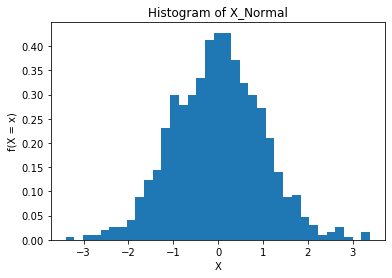

In [23]:
sim_num = 1000
n = 1000000
p = 0.5

X = np.random.binomial(n, p, size = sim_num)
X_normal = (X - n*p)/np.sqrt(n*p*(1-p))
    
plt.hist(X_normal, bins = 35, density = True)
plt.title("Histogram of X_Normal")
plt.xlabel('X')
plt.ylabel('f(X = x)')
plt.show()

### 2. Sampling Distribution, Confidence Interval, and Margin of Error

Suppose we wished to know whether or not a coin was fair (i.e. is $p = 0.5$?). To find out, we can generate samples of coin flips and analyze proportion of results that come up as heads. Let's call our estimate of $p$ as $\hat{p}$. p hat is my estimation of what p is


In [16]:
# Suppose we did not know what the "true" value of p was
p = 0.9
#i want to know p. how do i figure out what p is?
sample_size = 100

coin_flips = np.random.binomial(n = 1, p = p, size = sample_size) ## Single coin flips only!
p_hat = sum(coin_flips)/sample_size

print(coin_flips)
print(p_hat) #p hat is random, but how confident am i of my p hat?

[1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1]
0.91


Note that every time we run our code, we get a different $\hat{p}$. This implies that $\hat{p}$ itself is random and thus has a distribution associated with it. This is called a <b><i>sampling distribution</b></i>. (distribution of my estimate)

If we collect enough $\hat{p}$s we can plot its histogram to get an estimate of it's probability distribution.

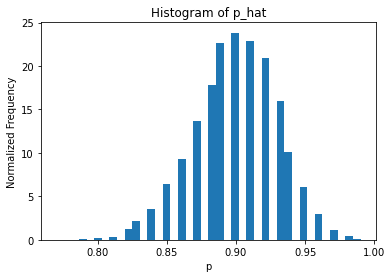

In [17]:
#finding pmf of p hat
sim_num = 10000 ## Number of p_hats to sample. NOTE: this is different from the sample size of coin flips!(i am tossing 100 coins a 1000 times)
p_hat_list = []

for i in range(0, sim_num):
    coin_flips = np.random.binomial(n = 1, p = p, size = sample_size)
    p_hat_list.append(sum(coin_flips)/sample_size)

plt.hist(p_hat_list, bins = 40, density = True)
plt.title("Histogram of p_hat")
plt.xlabel('p')
plt.ylabel('Normalized Frequency')
plt.show()

As it turns out, one can prove that (for a large enough sample size $n$) the sampling distribution of $\hat{p}$ follows a Normal distribution with the mean $\mu_{\hat{p}} = p$ and standard deviation $\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}$.

Given that $\hat{p}$ is random, how reliable is our estimate? Is there a way for us to quantify the uncertainty of our estimate?

Yes! We can summarize the uncertainty of our estimate using <b><i>confidence intervals (CI)</b></i>.

A confidence interval allows us to make statements about the range of plausible values for an unknown parameter (in this example $p$). The interval also has an associated "confidence level" that the true value of the parameter is in the proposed range.

To calculate a confidence interval for our estimate $\hat{p}$, we must first pick a confidence level $1 - \alpha$. Suppose we choose a confidence level of $1 - \alpha = 0.95$ which implies that $\alpha = 0.05$. We then calculate the corresponding $z$-score:

\begin{equation}
z = \Phi^{-1}\left(1 - \frac{\alpha}{2}\right)
\end{equation}

where $\Phi(x)$ is the CDF of the standard normal distribution. To calculate the z-score, you can look up the values on a Z-table or write code:

In [23]:
from scipy.stats import norm

alpha = 0.05
z_score = norm.ppf(1 - alpha/2)

print(z_score)

1.959963984540054


The confidence interval is then given by:

\begin{equation}
\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{equation}

The value $z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ is called the <b><i>margin of error (ERR)</b></i>. Note that since we don't know the true value $p$, we instead substitute $\hat{p}$ into the formula for standard deviation. When we do this, the value is known as the <b><i>standard error (SE)</b></i>.

In [ ]:


ERR = z_score*np.sqrt(p_hat*(1-p_hat)/sample_size)
CI_lowerbound = p_hat - ERR
CI_upperbound = p_hat + ERR

print(ERR)
print(CI_lowerbound)
print(CI_upperbound)

Using the calculated values, we can now say the following: <b><u>With 95% confidence, the true value of our parameter lies between 0.8543 and 0.966.</b></u>

What does 95% confidence mean? Note that because $\hat{p}$ is random, the ERR and CI bounds are also random (i.e. they change depending on what we sample). The interpretation is thus: if we repeat the sampling process many times, the true value of $p$ will be contained in the confidence interval 95% of the time.

#### Break

As you can probably tell, a lower margin of error is desirable. In cases where we can control our sample size (e.g. when taking a survey), we can instead set both our confidence level and margin of error to some target then calculate how many samples we need.

\begin{equation}
\text{ERR} = z_\alpha \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\end{equation}

Note that the max value of $p(1-p)$ is $0.25$. You can verify this yourself using the code below.

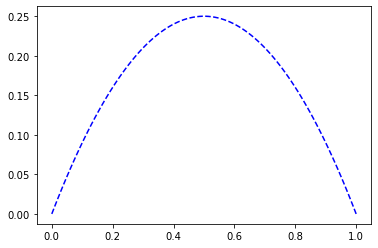

In [11]:
def my_function(x):
    return x*(1 - x)

x_range = np.linspace(0, 1, 100)

plt.plot(x_range, my_function(x_range), 'b--')
plt.show()

Thus we can simplify our equation to,

\begin{align*}
\text{ERR} &\approx z_\alpha \sqrt{\frac{1/4}{n}} \\
\text{ERR}^2 &\approx z_\alpha^2 \frac{1/4}{n} \\
n &\approx \frac{z_\alpha^2}{4(\text{ERR}^2)} \\
\end{align*}

Using this expression, we can calculate the minimum number of samples required to meet a target confidence level and margin of error.

In [19]:
ERR = 0.0285
alpha = 0.05
z_score = norm.ppf(1 - alpha/2)
n = z_score**2/(4*(ERR**2))

print('Samples needed:', n)

Samples needed: 1182.3511297919745


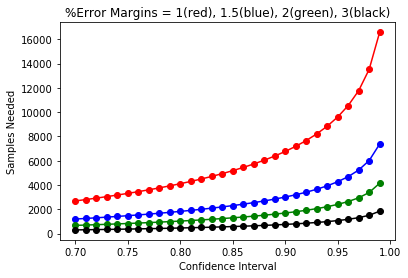

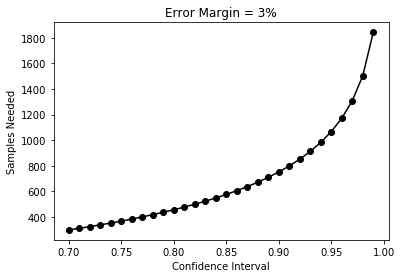

In [13]:
import scipy.stats as stats

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
ERR1=0.01
n_list1 =[stats.norm.ppf(1-((1-CI)/2))**2/(4*(ERR1**2)) \
          for CI in my_range(.7,.995,.01)] 
CI_list1=[CI for CI in my_range(.7,.995,.01)]

ERR2=0.015
n_list2 =[stats.norm.ppf(1-((1-CI)/2))**2/(4*(ERR2**2)) \
          for CI in my_range(.7,.995,.01)] 
CI_list2=[CI for CI in my_range(.7,.995,.01)]

ERR3=0.02
n_list3 =[stats.norm.ppf(1-((1-CI)/2))**2/(4*(ERR3**2)) \
          for CI in my_range(.7,.995,.01)] 
CI_list3=[CI for CI in my_range(.7,.995,.01)]

ERR4=0.03
n_list4 =[stats.norm.ppf(1-((1-CI)/2))**2/(4*(ERR4**2)) \
          for CI in my_range(.7,.995,.01)] 
CI_list4=[CI for CI in my_range(.7,.995,.01)]

ERR5=0.05
n_list5 =[stats.norm.ppf(1-((1-CI)/2))**2/(4*(ERR5**2)) \
          for CI in my_range(.7,.995,.01)] 
CI_list5=[CI for CI in my_range(.7,.995,.01)]

plt.figure(1)
plt.plot(CI_list1,n_list1,'ro-',CI_list2,n_list2,'bo-',\
         CI_list3,n_list3,'go-',CI_list4,n_list4,'ko-')
plt.xlabel("Confidence Interval")
plt.ylabel("Samples Needed")
plt.title("%Error Margins = 1(red), 1.5(blue), 2(green), 3(black)")

plt.figure(2)
plt.plot(CI_list4,n_list4,'ko-')
plt.xlabel("Confidence Interval")
plt.ylabel("Samples Needed")
plt.title("Error Margin = 3%")


plt.show()

In [14]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
def getNeededSamples(err):
    n_list = [stats.norm.ppf(1-((1-CI)/2))**2/(4*(err**2)) \
              for CI in my_range(.7, .995, .01)]
    CI_list = [CI for CI in my_range(.7, .995, .01)]
    
    
    myplot = [go.Scatter(x=CI_list, y=n_list,
                         marker={'color': '#1F77B4', 'size': 10, 'symbol': 'circle-open'},
                         mode='markers + lines')]
    
    pyoff.iplot(go.Figure(data=myplot, 
                          layout=go.Layout(title = 'Error Margins = {}'.format(err*100),
                                           xaxis=dict(title = 'Confidence Interval'), 
                                           yaxis=dict(title='Sample Needed'))))
    
    
errWidget = widgets.FloatSlider(min=0.01, max=0.1, step=0.005, value=0.01)

widgets.interact(getNeededSamples, err = errWidget);

interactive(children=(FloatSlider(value=0.01, description='err', max=0.1, min=0.01, step=0.005), Output()), _d…

#### Example 6. Election Sampling

#### Example 6A.

Assume you have five candidates A to E (**`candidates = ["A", "B", "C", "D", "E"]`**) and the voters preference are such that:

Candidate A = 35%

Candidate B = 25%

Candidate C = 20%

Candidate D = 15%

Candidate E = 5%

Generate 50 Million individuals (**`population = 50000000`**), which is close to the actual voting population of the Philippines, who vote in a manner consistent with these percentages. 

In [15]:
population = 500000
candidates = ['A', 'B', 'C', 'D', 'E']
p_vec = [.35, .25, .20, .15, .05]

votes = np.random.choice(candidates, population, p = p_vec).tolist() ## Convert to list so we can use the count() fnc

print(votes[:100])

print('Votes for A =', votes.count('A'))
print('Votes for B =', votes.count('B'))
print('Votes for C =', votes.count('C'))
print('Votes for D =', votes.count('D'))
print('Votes for E =', votes.count('E'))

['B', 'A', 'E', 'B', 'A', 'B', 'D', 'B', 'D', 'D', 'E', 'D', 'C', 'C', 'B', 'C', 'A', 'D', 'B', 'A', 'A', 'A', 'C', 'B', 'B', 'D', 'C', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'A', 'A', 'A', 'B', 'C', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'E', 'A', 'C', 'D', 'C', 'B', 'C', 'B', 'C', 'B', 'A', 'E', 'B', 'A', 'B', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'D', 'B', 'B', 'B', 'C', 'B', 'D', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'C', 'B', 'A', 'E', 'A', 'A', 'B', 'D', 'E', 'A', 'A', 'A', 'B']
Votes for A = 175220
Votes for B = 124743
Votes for C = 99924
Votes for D = 74995
Votes for E = 25118


#### Example 6B.

If your sample the population of 50 million with just 50 to 10,000 voters, how accurate your representation will be?

In [16]:
sample_50 = np.random.choice(votes, 50).tolist()
sample_10000 = np.random.choice(votes, 10000).tolist()

print(sample_50)

['D', 'C', 'D', 'B', 'C', 'D', 'A', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'C', 'A', 'D', 'A', 'B', 'C', 'C', 'A', 'B', 'C', 'D', 'B', 'A', 'D', 'A', 'A', 'A', 'D', 'B', 'A', 'A', 'C', 'A', 'C', 'B', 'C', 'C', 'C', 'C', 'B', 'B', 'B', 'A', 'A', 'A', 'D']


In [17]:
from collections import Counter
import pandas as pd

tableau10 = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', 
             '#8C564B', '#CFECF9', '#7F7F7F', '#BCBD22', '#17BECF']

sampled_population_reference = 10000

def get_sample_votes(sample_pop1, sample_pop2, votes):
    sample = {}
    for pop in [sample_pop1, sample_pop2]:
        sample["SS_{}".format(pop)] = dict(Counter(np.random.choice(votes,pop)))
    df = pd.DataFrame.from_dict(sample)
    
    df.reset_index(inplace=True)
    df.columns = ["candidate"] + list(df.columns[1:])
    df = pd.melt(df, id_vars = "candidate", value_vars=list(df.columns[1:]))
    
    df["total"] = df.groupby('variable').value.transform("sum")
    df["pct"] = df.apply(lambda x: x["value"]*100/x["total"] , axis=1)
    df["error"] = df.apply(lambda x: (100*1.96/(4*x["total"])**.5), axis=1)


    
    df = df.sort_values(["candidate","total"])
    data = []
    
    i = 0
    for ky in sample.keys():
        data.append(go.Bar(x=df[df["variable"] == ky]["candidate"],
                           y=df[df["variable"] == ky]["pct"],
                           name = ky,
                           marker_color = tableau10[i],
                           error_y = dict(type='data', array=df[df["variable"] == ky]["error"].values)))
        i = i + 1
        
    layout = go.Layout(
            title = "Survey scenario for different number of randomly surveyed individuals (Population = 50 million)",
            barmode = 'group',
            xaxis = dict(title = 'Candidates'),
            yaxis = dict(title = '% of Total Votes'))
    fig = go.Figure(data=data, layout=layout, )
    pyoff.iplot(fig)

sample_pop1_widget = widgets.IntSlider(min=50, max=2000, step = 50, value=50, continuous_update=False)
widgets.interact(get_sample_votes, sample_pop1=sample_pop1_widget, sample_pop2=widgets.fixed(sampled_population_reference), votes = widgets.fixed(votes));

interactive(children=(IntSlider(value=50, continuous_update=False, description='sample_pop1', max=2000, min=50…

### Concluding Remarks

1. Our estimates change every run because our samples change every run. 
2. More samples results in better accuracy and a smaller CI/ERR.
3. Surveys that are not done right can be misleading. In this example, we can uniformly sample from the whole population. In real life, we need to consider other variables when sampling (e.g. geography, socio-economic indicators, cognitive biases).
4. We only need approx. 1200 samples to get "good" estimates (0.000024 of 50 million). 95% confidence + 0.0285 ERR.